In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import seaborn as sns

Load the Data: Import the Boston Housing dataset from the sklearn library and convert it into a pandas DataFrame.

Hint: Use load_boston() from sklearn.datasets to load the dataset. Then, use pandas.DataFrame() to convert this data into a table (DataFrame).

In [116]:
boston = pd.read_csv('BostonHousing.csv')

In [117]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [118]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [119]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


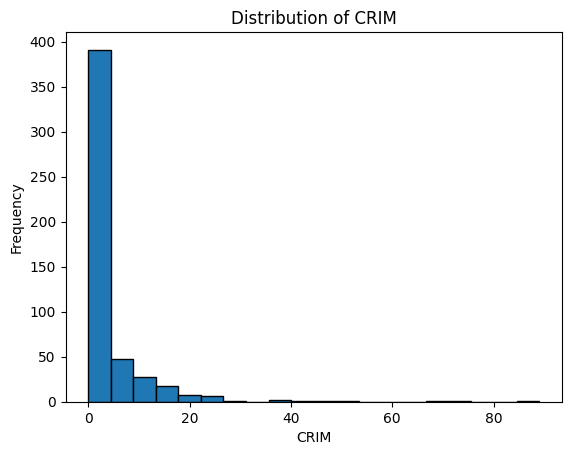

In [120]:
plt.hist(boston['crim'], bins=20, edgecolor='black')
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.title('Distribution of CRIM')
plt.show()

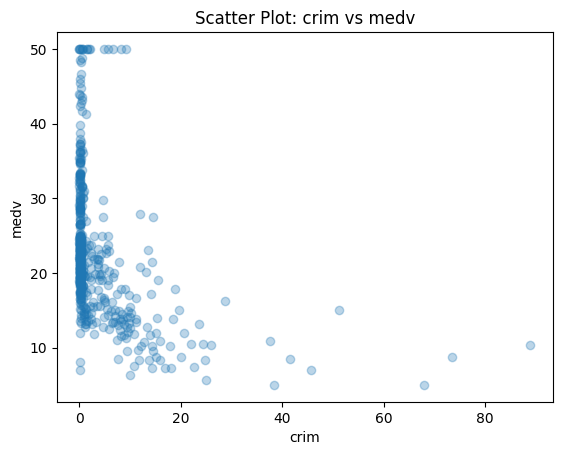

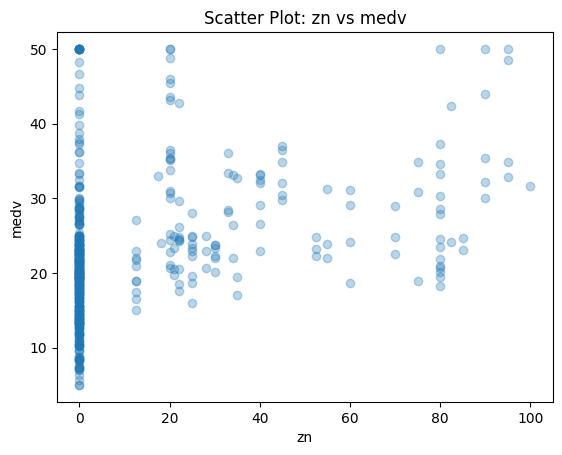

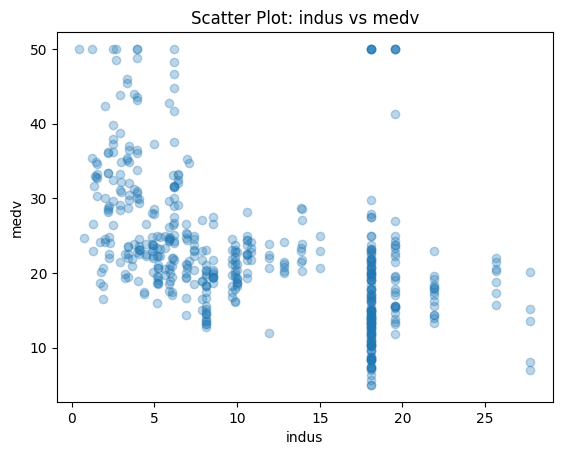

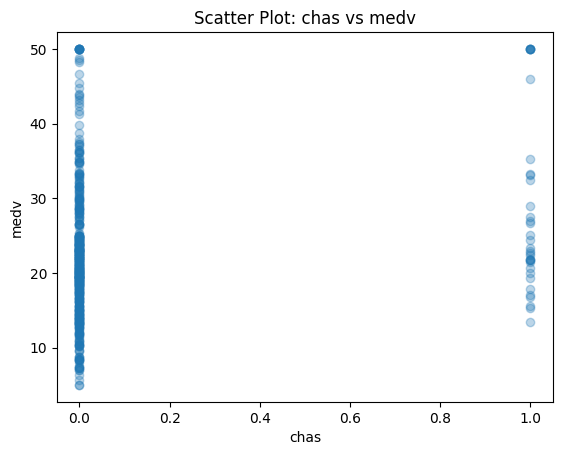

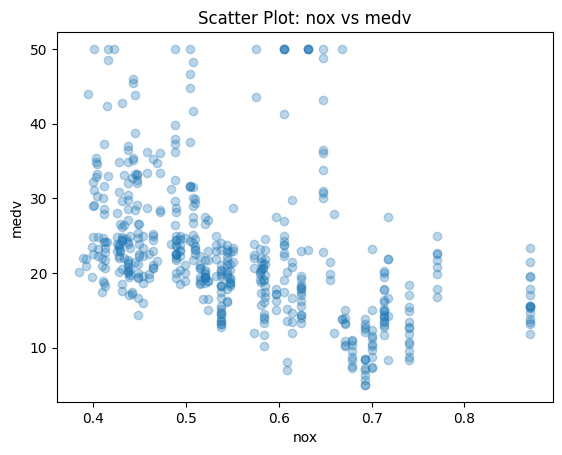

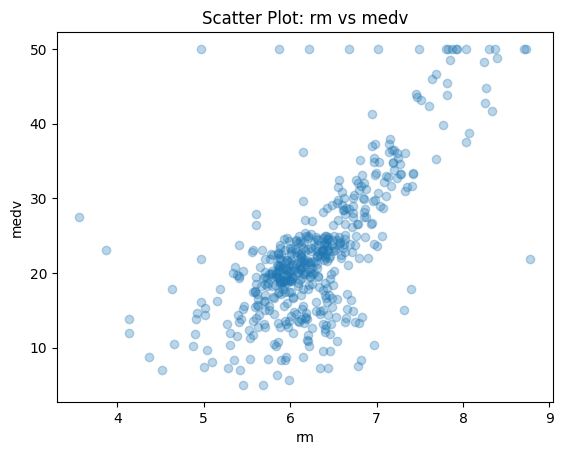

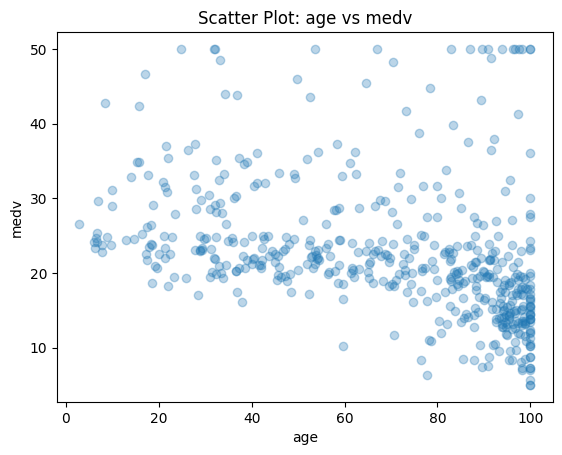

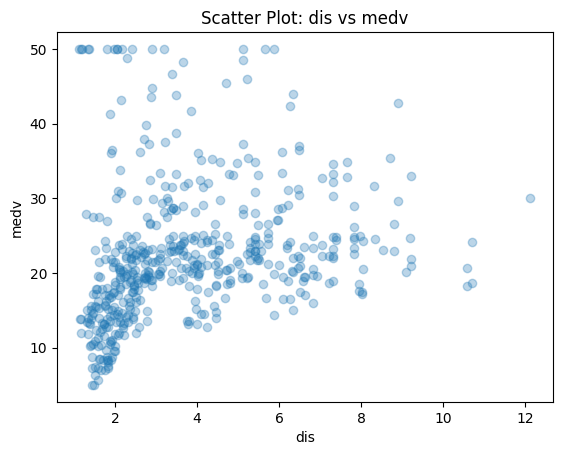

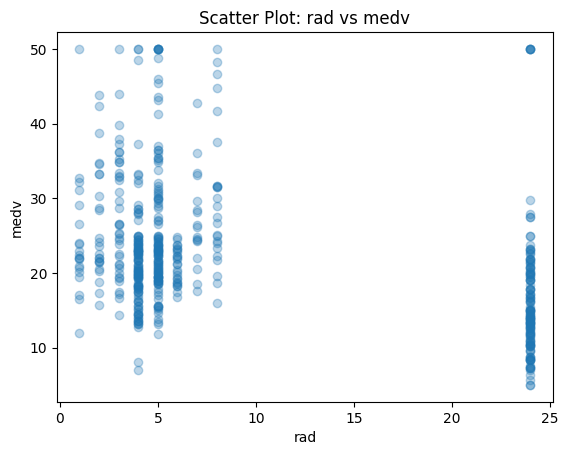

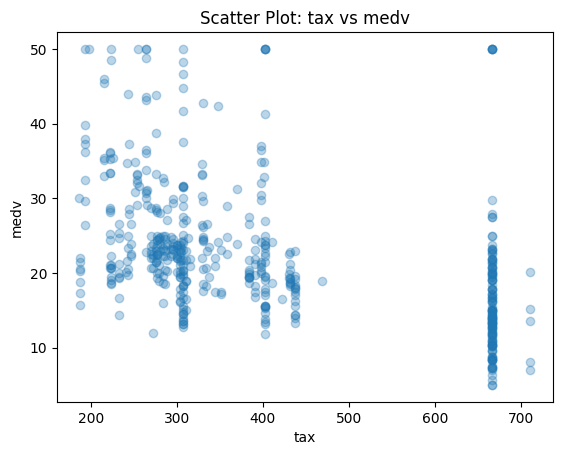

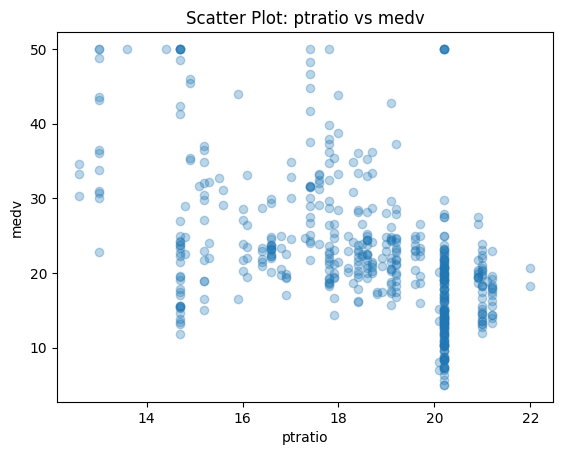

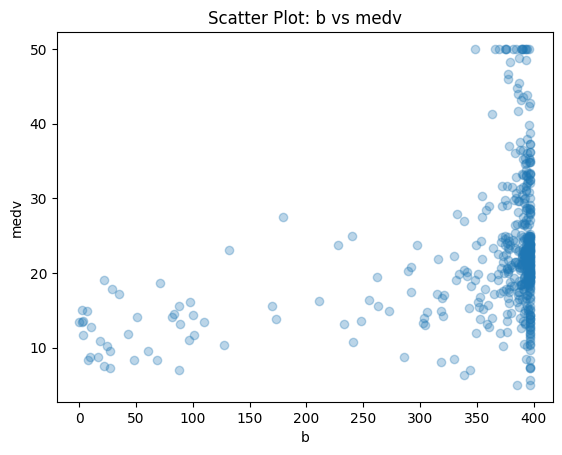

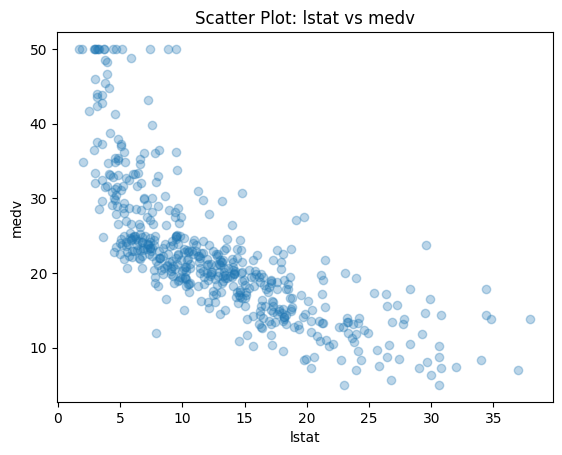

In [121]:
columns = [col for col in boston.columns if col != 'medv']
for column in columns:
    plt.scatter(boston[column], boston['medv'], alpha=0.3)
    plt.xlabel(column)
    plt.ylabel('medv')
    plt.title(f'Scatter Plot: {column} vs medv')
    plt.show()

In [122]:
missing_data = boston.isnull().sum()

In [123]:
missing_data

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [124]:
scaler = MinMaxScaler()
boston_scaled = scaler.fit_transform(boston)
boston = pd.DataFrame(boston_scaled, columns=boston.columns)

In [125]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [126]:
age_bins = [0, 35, 70, float('inf')]
age_labels = ['new', 'old', 'very_old']
boston_with_age_categories = boston.copy()
boston_with_age_categories['age_category'] = pd.cut(boston_with_age_categories['age'], bins=age_bins, labels=age_labels)

print(boston_with_age_categories.head())

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_age_categories = encoder.fit_transform(boston_with_age_categories[['age_category']])
encoded_age_df = pd.DataFrame(encoded_age_categories, columns=encoder.get_feature_names_out(['age_category']))

print(encoded_age_df.head())

       crim    zn     indus  chas       nox        rm       age       dis  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        rad       tax   ptratio         b     lstat      medv age_category  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222          new  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889          new  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000          new  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111          new  
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333          new  
   age_category_nan
0               0.0
1               0.0
2              

In [127]:
correlation = boston['crim'].corr(boston['age'])
print('Correlation CRIM with AGE:', correlation)

Correlation CRIM with AGE: 0.35273425090136434


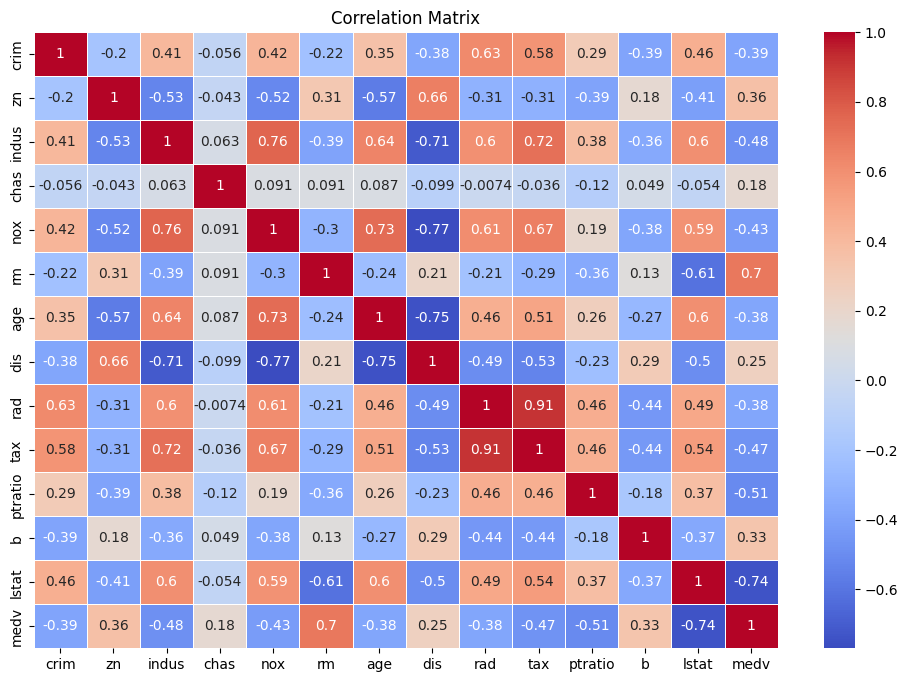

In [128]:
correlation_matrix = boston.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [129]:
boston['Avg_room_lower_stat'] = boston['rm'] * boston['lstat']
print(boston.head())

       crim    zn     indus  chas       nox        rm       age       dis  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        rad       tax   ptratio         b     lstat      medv  \
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222   
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889   
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000   
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111   
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333   

   Avg_room_lower_stat  
0             0.051791  
1             0.112049  
2             0.044070  
3             0.021988  
4             0.06825